# 0. Run the backtest code

In [2]:
# Rb 5min test
# !python ../Main.py -o ../Results/Ag_15min_PriceThreshold -c ../Config/Ag_15min_PriceThreshold.json > /dev/null


/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
# sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/')
sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Ag - 5min 

In [16]:
Ag_5min_result = GetResult("../Results/Ag_5min_PriceThreshold/")


Tester= 0 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_0.pkl

Tester= 1 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_1.pkl

Tester= 2 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_2.pkl

Tester= 3 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_3.pkl

Tester= 4 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_4.pkl

Tester= 5 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_5.pkl

Tester= 6 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_6.pkl

Tester= 7 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_7.pkl

Tester= 8 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_8.pkl

Tester= 9 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_9.pkl

Tester= 10 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_10.pkl

Tester= 11 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_11.pkl

Tester= 12 |file_path =  ../Results/Ag_5min_PriceThreshold/Result_12.pkl

Tester= 13 |file_path =  ../Results/Ag_5min_PriceThreshol

## 1.0 Ag - 5min offset average - group test results by price threshold

In [3]:
# len(Rb_5min_result)
# print(Rb_5min_result[0]['localPara'])
# Rb_5min_result[0]

In [17]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Ag_5min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# 1 NO trading cost

## 1.1 Ag --- 5min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

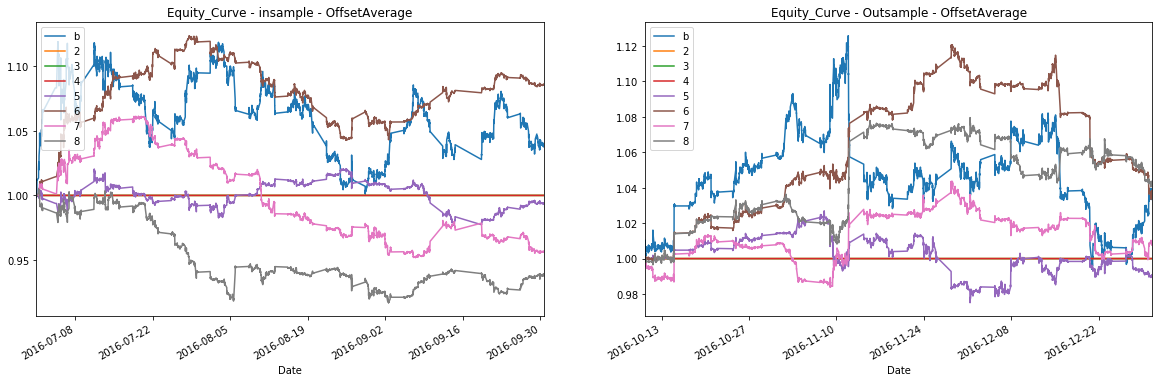

In [18]:
Ag_5min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Ag_5min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ag_5min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [19]:
Ag_5min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
3,0.211529,-0.000071,-0.018182,0.017708,-0.000059,-0.052763,0.054557,-0.115651,1.110951,-0.082873,17.8,0.987748,0.479167
4,0.209841,0.001099,-0.011490,0.013648,0.002092,-0.053319,0.053091,-0.112380,1.200152,1.333661,49.6,1.081642,0.525102
5,0.209761,-0.000565,-0.010277,0.008844,-0.000419,-0.045946,0.047985,-0.169164,0.892623,-0.747973,89.4,0.960674,0.503952
6,0.209085,-0.000814,-0.008775,0.008582,-0.000615,-0.041154,0.045203,-0.172582,1.001144,-0.878426,102.2,0.941956,0.464681


In [20]:
Ag_5min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
3,0.174080,-0.000127,NaN,0.019579,0.002034,-0.031876,0.045617,-0.107550,NaN,-0.196427,16.4,0.992415,0.452385
4,0.182852,0.000541,-0.011839,0.013048,0.001155,-0.042317,0.058174,-0.109046,1.095336,0.745293,37.4,1.035528,0.508919
5,0.172302,0.000127,-0.009040,0.010303,0.000111,-0.045853,0.049597,-0.117630,1.240225,0.386163,56.6,1.009822,0.463982
6,0.181621,0.000616,-0.007664,0.010151,0.000665,-0.030192,0.047741,-0.104059,1.366494,0.843415,60.8,1.045147,0.459404


## 1.2  Ag --- 5min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

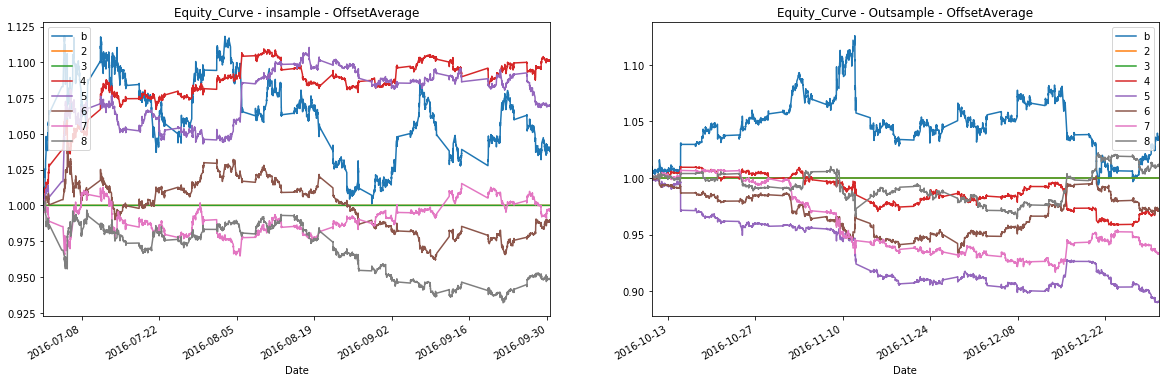

In [21]:
Ag_5min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Ag_5min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ag_5min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [22]:
Ag_5min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.218488,0.001287,NaN,NaN,0.002522,-0.020634,0.040933,-0.095534,NaN,1.427166,132.8,1.099490,0.411536
3,0.229083,0.000912,-0.004682,0.005701,0.000322,-0.026288,0.049454,-0.117163,1.231771,1.105960,264.4,1.070805,0.476115
4,0.206766,-0.000118,-0.003998,0.004393,0.000003,-0.032838,0.037839,-0.150066,1.102940,-0.042231,369.0,0.990043,0.468897
5,0.220105,-0.000015,-0.003387,0.003730,-0.000009,-0.032929,0.032959,-0.126989,1.103823,-0.060234,502.6,0.999165,0.466806
6,0.215925,-0.000674,-0.003296,0.003266,-0.000088,-0.033746,0.026803,-0.144995,0.990733,-0.818082,552.8,0.948185,0.481317


In [23]:
Ag_5min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
2,0.173606,-0.000400,NaN,NaN,-0.000293,-0.024566,0.023848,-0.124737,NaN,-0.607454,89.6,0.969260,0.404848
3,0.173899,-0.001618,-0.004611,0.004256,-0.000547,-0.033142,0.029417,-0.136246,0.957444,-2.226854,210.8,0.890175,0.442091
4,0.176580,-0.000401,-0.003551,0.003532,-0.000084,-0.026173,0.028221,-0.114867,1.011995,-0.592881,297.4,0.969753,0.481501
5,0.167291,-0.000964,-0.002972,0.003028,-0.000164,-0.023993,0.030052,-0.145982,1.025494,-1.472741,407.2,0.932463,0.458716
6,0.169277,0.000177,-0.002622,0.002839,0.000027,-0.022522,0.027026,-0.098920,1.086445,0.303015,461.2,1.010154,0.477810


## 1.3  Ag --- 5min offset average --- price threshold = 0bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

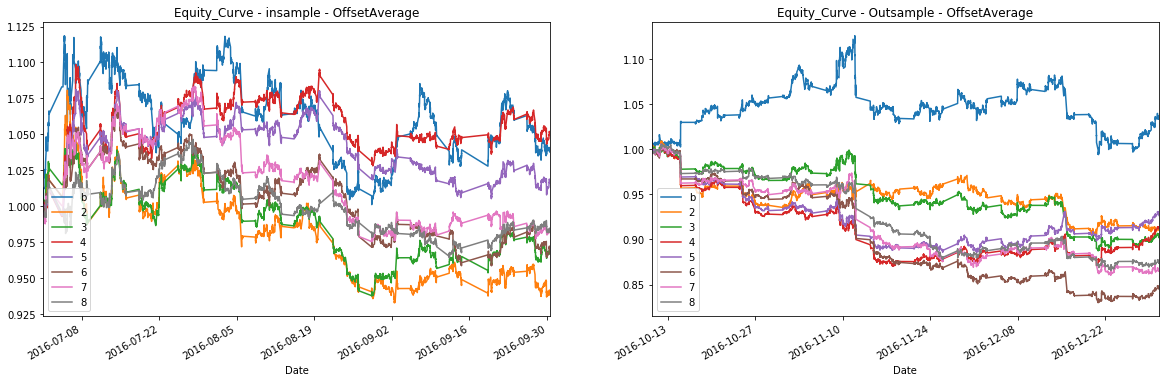

In [24]:
Ag_5min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0])

Benchmark = Ag_5min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_5min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [25]:
Ag_5min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.204738,-0.000780,-0.000956,0.001350,-0.000018,-0.021008,0.035542,-0.161669,1.412291,-0.950753,3286.6,0.937808,0.378465
1,0.214300,-0.000406,-0.001031,0.001265,-0.000009,-0.023962,0.033899,-0.151826,1.234546,-0.523693,3287.4,0.966672,0.406955
2,0.231680,0.000685,-0.001074,0.001314,0.000015,-0.020140,0.030170,-0.120583,1.224885,0.675356,3159.6,1.047006,0.430501
3,0.212218,0.000248,-0.001055,0.001272,0.000006,-0.022600,0.030012,-0.126529,1.209978,0.169741,3377.4,1.015114,0.425769
4,0.225604,-0.000364,-0.001055,0.001245,-0.000008,-0.025339,0.034002,-0.150621,1.182269,-0.362129,3571.0,0.966148,0.422033
5,0.203484,-0.000208,-0.001056,0.001224,-0.000004,-0.024781,0.035752,-0.137311,1.160233,-0.242467,3571.0,0.979420,0.425419
6,0.204771,-0.000180,-0.001098,0.001192,-0.000004,-0.038032,0.027008,-0.143408,1.086689,-0.222832,3469.4,0.983037,0.442336


In [26]:
Ag_5min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.148405,-0.001286,-0.000814,0.001116,-0.000030,-0.023520,0.021416,-0.122126,1.369955,-2.196489,3058.8,0.909597,0.375198
1,0.181700,-0.001430,-0.000899,0.001038,-0.000033,-0.023266,0.021175,-0.141720,1.168769,-1.936155,3065.4,0.900570,0.407065
2,0.170303,-0.001271,-0.000935,0.001042,-0.000031,-0.023422,0.014820,-0.164214,1.117668,-1.732634,2926.0,0.911704,0.427762
3,0.166356,-0.001049,-0.000918,0.001016,-0.000025,-0.023472,0.015069,-0.148488,1.113945,-1.413049,3140.8,0.926212,0.428977
4,0.170052,-0.002334,-0.000925,0.000980,-0.000051,-0.023564,0.012945,-0.187555,1.061914,-3.453753,3309.6,0.844097,0.422589
5,0.183944,-0.002014,-0.000938,0.000976,-0.000045,-0.023520,0.014524,-0.168782,1.042788,-2.776731,3256.2,0.865080,0.427583
6,0.165926,-0.001867,-0.000971,0.000989,-0.000043,-0.023999,0.016413,-0.173280,1.020580,-2.750669,3155.0,0.875565,0.436622


## 2 Fixed Trading Cost

## 2.1 Ag --- 5min offset average --- price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

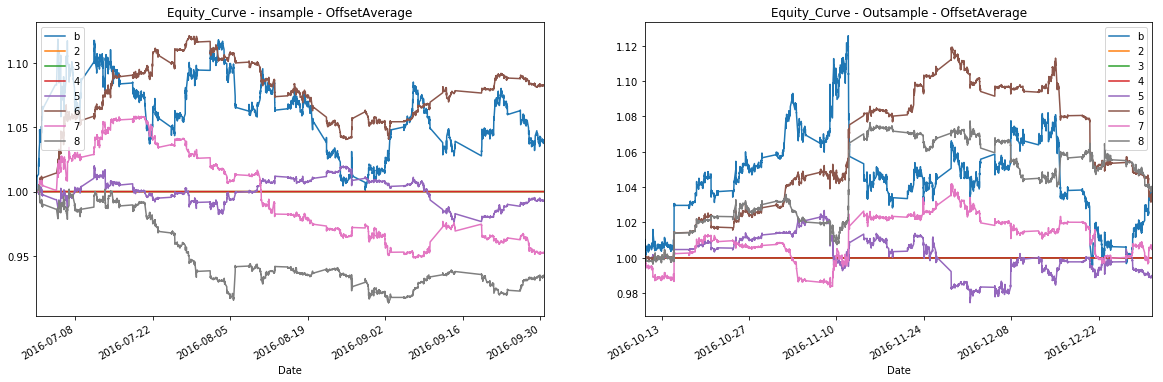

In [27]:
Ag_5min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[10e-4])

Benchmark = Ag_5min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Ag_5min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [29]:
Ag_5min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
1,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
2,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
3,0.211508,-8.261307e-05,-0.015102,0.018170,-0.000109,-0.052813,0.054507,-0.115897,1.330886,-0.096548,17.8,0.986872,0.462500
4,0.209662,1.065956e-03,-0.010755,0.013710,0.002042,-0.053369,0.053041,-0.112752,1.278520,1.295843,49.6,1.078982,0.521329
5,0.209717,-6.234010e-04,-0.009854,0.008994,-0.000469,-0.045996,0.047935,-0.170693,0.947379,-0.817398,89.4,0.956417,0.493756
6,0.209133,-8.811295e-04,-0.008530,0.008593,-0.000665,-0.041204,0.045153,-0.174763,1.033383,-0.958273,102.2,0.937156,0.460977


In [30]:
Ag_5min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
1,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
2,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
3,0.174116,-1.387016e-04,-0.010944,0.019529,0.001984,-0.031926,0.045567,-0.107869,107.771952,-0.211604,16.4,0.991602,0.452385
4,0.182886,5.149574e-04,-0.010971,0.013098,0.001105,-0.042367,0.058124,-0.109440,1.187445,0.709800,37.4,1.033600,0.503514
5,0.172241,8.695647e-05,-0.008784,0.010253,0.000061,-0.045903,0.049547,-0.118536,1.268211,0.327928,56.6,1.006962,0.463982
6,0.181611,5.731899e-04,-0.007480,0.010101,0.000615,-0.030242,0.047691,-0.104797,1.392794,0.785034,60.8,1.041962,0.459404


## 2.2  Ag --- 5min offset average --- price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

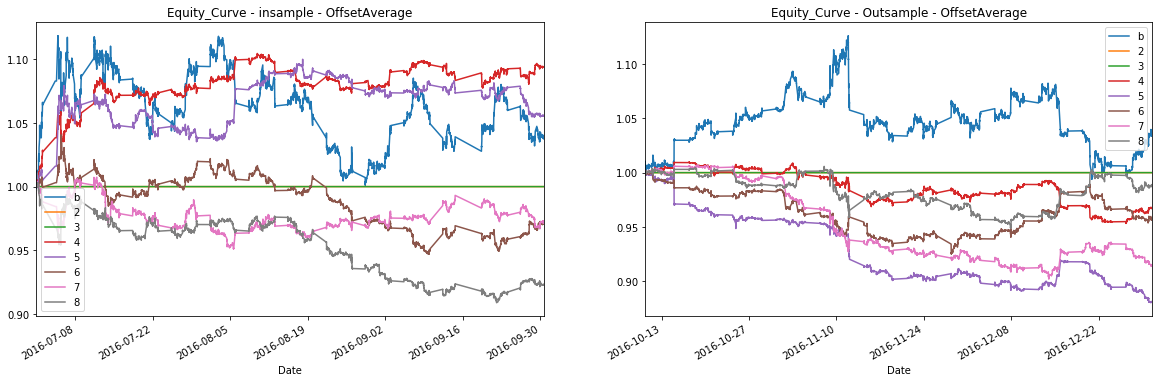

In [33]:
Ag_5min_Offset_Average_5bps = OffSetAverage(FixedCost_Result_Group[5e-4])

Benchmark = Ag_5min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Ag_5min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [34]:
Ag_5min_Offset_Average_5bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
1,0.000091,-6.578947e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.813691,1.0,0.999950,0.000000
2,0.218313,1.199318e-03,-0.005553,NaN,0.002472,-0.020684,0.040883,-0.097262,NaN,1.331588,132.8,1.091803,0.410614
3,0.229163,7.381202e-04,-0.004571,0.005781,0.000272,-0.026338,0.049404,-0.122798,1.279803,0.919156,264.4,1.056928,0.465750
4,0.206882,-3.606742e-04,-0.003891,0.004423,-0.000047,-0.032888,0.037789,-0.158014,1.140554,-0.335017,369.0,0.972149,0.460615
5,0.220225,-3.454615e-04,-0.003283,0.003740,-0.000059,-0.032979,0.032909,-0.138458,1.142176,-0.434694,502.6,0.974279,0.459357
6,0.216039,-1.037824e-03,-0.003188,0.003289,-0.000138,-0.033796,0.026753,-0.156661,1.031449,-1.239745,552.8,0.922407,0.470859


In [35]:
Ag_5min_Offset_Average_5bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
1,0.000094,-7.042254e-07,-0.000050,NaN,-0.000050,-0.000050,-0.000050,0.000000,NaN,-1.876467,1.0,0.999950,0.000000
2,0.173683,-4.629638e-04,-0.006513,NaN,-0.000343,-0.024616,0.023798,-0.127237,NaN,-0.698125,89.6,0.964985,0.399059
3,0.174250,-1.766128e-03,-0.004424,0.004283,-0.000597,-0.033192,0.029367,-0.142855,0.997861,-2.435791,210.8,0.880924,0.434324
4,0.176830,-6.108494e-04,-0.003447,0.003536,-0.000134,-0.026223,0.028171,-0.119209,1.043142,-0.888343,297.4,0.955508,0.473873
5,0.167495,-1.250762e-03,-0.002862,0.003055,-0.000214,-0.024043,0.030002,-0.155096,1.075176,-1.898033,407.2,0.913701,0.447376
6,0.169717,-1.478179e-04,-0.002531,0.002871,-0.000023,-0.022572,0.026976,-0.106243,1.136630,-0.174885,461.2,0.987122,0.464560


## 2.3  Ag --- 5min offset average --- price threshold = 0

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

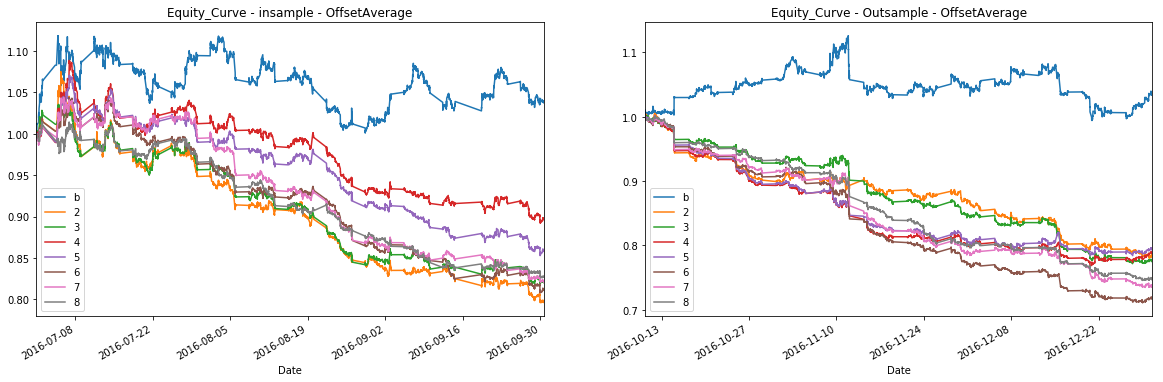

In [36]:
Ag_5min_Offset_Average_0bps = OffSetAverage(FixedCost_Result_Group[0e-4])

Benchmark = Ag_5min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Ag_5min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [37]:
Ag_5min_Offset_Average_0bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.207330,-0.002942,-0.000868,0.001393,-0.000068,-0.021058,0.035492,-0.266698,1.604578,-3.558284,3286.6,0.795701,0.354013
1,0.215455,-0.002569,-0.000904,0.001286,-0.000059,-0.024012,0.033849,-0.245245,1.428472,-3.044568,3287.4,0.820110,0.386105
2,0.232044,-0.001394,-0.000977,0.001343,-0.000035,-0.020190,0.030120,-0.195822,1.378038,-1.581749,3159.6,0.893608,0.406015
3,0.212704,-0.001974,-0.000950,0.001289,-0.000044,-0.022650,0.029962,-0.217524,1.360127,-2.477932,3377.4,0.857846,0.404704
4,0.226116,-0.002714,-0.000943,0.001257,-0.000058,-0.025389,0.033952,-0.255256,1.334046,-2.993145,3571.0,0.808342,0.402256
5,0.203497,-0.002558,-0.000935,0.001229,-0.000054,-0.024831,0.035702,-0.240847,1.314478,-3.135259,3571.0,0.819655,0.407409
6,0.204383,-0.002463,-0.000973,0.001192,-0.000054,-0.038082,0.026958,-0.236322,1.225995,-3.025559,3469.4,0.826669,0.424550


In [38]:
Ag_5min_Offset_Average_0bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.150004,-0.003440,-0.000741,0.001143,-0.000080,-0.023570,0.021366,-0.231068,1.542218,-5.768855,3058.8,0.780604,0.351068
1,0.182552,-0.003588,-0.000792,0.001044,-0.000083,-0.023316,0.021125,-0.243283,1.328773,-4.968683,3065.4,0.772607,0.386959
2,0.170277,-0.003332,-0.000847,0.001061,-0.000081,-0.023472,0.014770,-0.249906,1.257406,-4.809942,2926.0,0.787626,0.401079
3,0.166214,-0.003261,-0.000825,0.001027,-0.000075,-0.023522,0.015019,-0.234470,1.251319,-4.810149,3140.8,0.791462,0.405040
4,0.170478,-0.004665,-0.000826,0.000987,-0.000101,-0.023614,0.012895,-0.300405,1.197649,-6.876080,3309.6,0.715481,0.399547
5,0.184307,-0.004307,-0.000830,0.000973,-0.000095,-0.023570,0.014474,-0.273464,1.174688,-5.931917,3256.2,0.734887,0.407814
6,0.165912,-0.004089,-0.000863,0.000987,-0.000093,-0.024049,0.016363,-0.265367,1.146127,-6.103599,3155.0,0.747582,0.416524
